In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

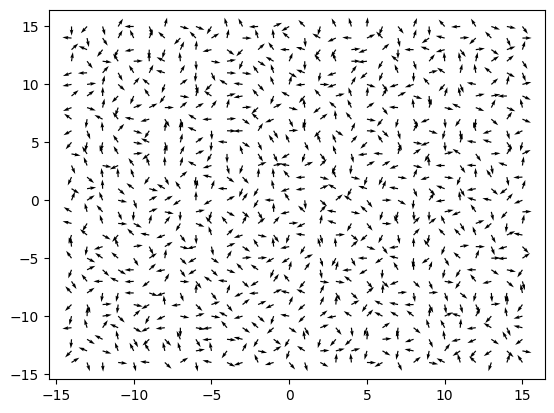

In [141]:
n = 30
x_grid, y_grid = np.mgrid[-n // 2 + 1:n // 2 + 1, -n // 2 + 1:n // 2 + 1]

theta = np.random.rand(n, n) * 2 * np.pi
omega = np.zeros((n, n))
x = np.cos(theta)
y = np.sin(theta)

plt.quiver(x_grid, y_grid, x, y);

0.44727316021527375 0.08510525414737868 -0.50114872000632 -0.26601929290864645


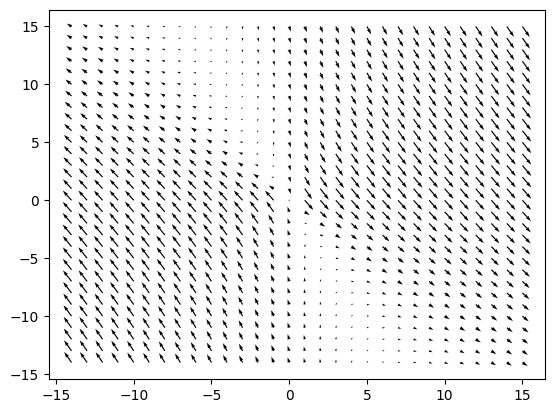

In [142]:
def B(x_grid, y_grid, a, b, c, d):
    B_x = a * x_grid + b * y_grid
    B_y = c * x_grid + d * y_grid

    B_x = B_x / np.sqrt(x_grid**2 + y_grid**2 + 1e-10)
    B_y = B_y / np.sqrt(x_grid**2 + y_grid**2 + 1e-10)
    return B_x, B_y

a, b, c, d = np.random.rand(4) * 2 - 1

print(a, b, c, d)

B_x, B_y = B(x_grid, y_grid, a, b, c, d)
B_angle = np.arctan2(B_y, B_x)
B_mag = np.sqrt(B_x**2 + B_y**2)

plt.quiver(x_grid, y_grid, B_x, B_y);

Convergence after 951 iterations


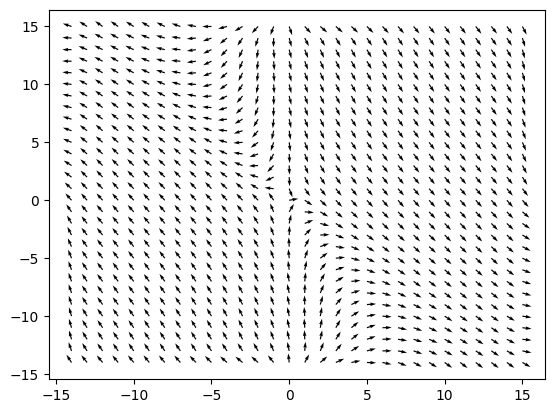

In [143]:
alpha = 1
beta = 1
gamma = 0.1
dt = 1e-1
n_max = 10000

i = 0
while i < n_max and (np.mean(np.abs(omega)) > 1e-2 or i < 100):
    i += 1

    x_up = np.roll(x, 1, axis=0)
    x_down = np.roll(x, -1, axis=0)
    x_left = np.roll(x, 1, axis=1)
    x_right = np.roll(x, -1, axis=1)

    y_up = np.roll(y, 1, axis=0)
    y_down = np.roll(y, -1, axis=0)
    y_left = np.roll(y, 1, axis=1)
    y_right = np.roll(y, -1, axis=1)

    x_neighbors = x_right + x_left + x_up + x_down
    y_neighbors = y_right + y_left + y_up + y_down

    theta_neighbors = np.arctan2(y_neighbors, x_neighbors)

    force_nieghbors = np.sin(theta_neighbors - theta)
    force_field = np.sin(B_angle - theta) * B_mag

    force = alpha * force_nieghbors + beta * force_field
    friction = gamma * omega
    
    # Verlet integration
    omega += dt * (force - friction)
    theta += dt * omega
    theta %= 2 * np.pi

    x = np.cos(theta)
    y = np.sin(theta)

if i == n_max:
    print('No convergence')
else:
    print(f'Convergence after {i} iterations')

plt.quiver(x_grid, y_grid, x, y);

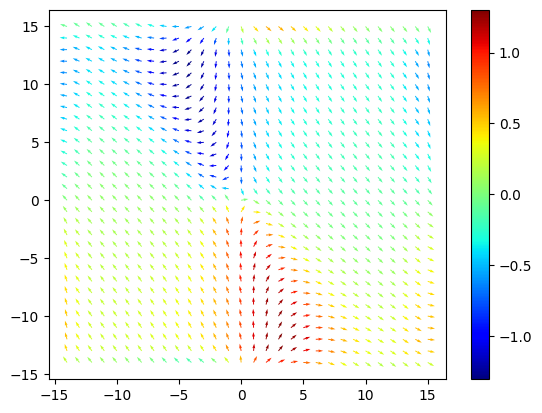

In [144]:
n_neighbors = 4
x_average = convolve(x, np.ones((n_neighbors, n_neighbors)) / n_neighbors**2, mode='wrap')
y_average = convolve(y, np.ones((n_neighbors, n_neighbors)) / n_neighbors**2, mode='wrap')

magnetization = x_average + y_average

plt.quiver(x_grid, y_grid, x, y, magnetization, cmap='jet')
plt.colorbar();

Convergence after 422 iterations


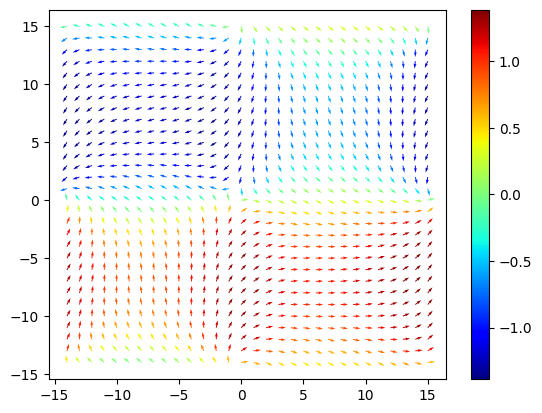

In [145]:
beta = 0

i = 0
while i < n_max and (np.mean(np.abs(omega)) > 1e-2 or i < 100):
    i += 1

    x_up = np.roll(x, 1, axis=0)
    x_down = np.roll(x, -1, axis=0)
    x_left = np.roll(x, 1, axis=1)
    x_right = np.roll(x, -1, axis=1)

    y_up = np.roll(y, 1, axis=0)
    y_down = np.roll(y, -1, axis=0)
    y_left = np.roll(y, 1, axis=1)
    y_right = np.roll(y, -1, axis=1)

    x_neighbors = x_right + x_left + x_up + x_down
    y_neighbors = y_right + y_left + y_up + y_down

    theta_neighbors = np.arctan2(y_neighbors, x_neighbors)

    force_nieghbors = np.sin(theta_neighbors - theta)
    force_field = np.sin(B_angle - theta) * B_mag

    force = alpha * force_nieghbors + beta * force_field
    friction = gamma * omega

    # Verlet integration
    omega += dt * (force - friction)
    theta += dt * omega
    theta %= 2 * np.pi

    x = np.cos(theta)
    y = np.sin(theta)

if i == n_max:
    print('No convergence')
else:
    print(f'Convergence after {i} iterations')

x_average = convolve(x, np.ones((n_neighbors, n_neighbors)) / n_neighbors**2, mode='wrap')
y_average = convolve(y, np.ones((n_neighbors, n_neighbors)) / n_neighbors**2, mode='wrap')

magnetization = x_average + y_average

plt.quiver(x_grid, y_grid, x, y, magnetization, cmap='jet')
plt.colorbar();